# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [16]:
!pip install tensorflow keras

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
import tensorflow as tf
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pollution_dataset.csv')
df.sample(5)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
1576,37.5,95.7,6.1,28.0,32.9,20.7,1.73,8.9,802,Poor
4558,36.2,58.4,2.0,14.7,22.9,5.9,1.17,5.5,533,Moderate
1243,27.1,74.1,4.7,8.7,25.3,5.9,1.00,13.5,555,Good
3307,39.3,59.3,3.3,14.2,22.5,18.6,2.12,4.4,775,Poor
2944,34.0,58.3,36.6,52.4,28.4,5.3,1.49,6.9,499,Moderate


In [50]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [51]:
df['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [52]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

X = df.iloc[:, :-1]
Y = df.iloc[:, -1:]

target_encoder = LabelEncoder()

y_encoded = target_encoder.fit_transform(Y.values.ravel())
y_encoded.shape
y_categorical = to_categorical(y_encoded)
y_categorical

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Model 1: Simple Neural Network
model1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
# Model 2: Deep Neural Network
model2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(y_categorical.shape[1], activation='softmax')
])
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
# Model 3: Wide Neural Network
model3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6986 - loss: 0.8230 - val_accuracy: 0.8850 - val_loss: 0.3426
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8911 - loss: 0.3120 - val_accuracy: 0.9090 - val_loss: 0.2357
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9080 - loss: 0.2369 - val_accuracy: 0.9210 - val_loss: 0.2022
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9275 - loss: 0.1978 - val_accuracy: 0.9290 - val_loss: 0.1902
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9343 - loss: 0.1776 - val_accuracy: 0.9350 - val_loss: 0.1709
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9349 - loss: 0.1641 - val_accuracy: 0.9430 - val_loss: 0.1590
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9339 - loss: 0.1598 - val_accuracy: 0.9440 - val_loss: 0.1564
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9376 - loss: 0.1626 - val_accuracy: 0.

In [45]:
loss1, acc1 = model1.evaluate(X_test, y_test, verbose=0)
loss2, acc2 = model2.evaluate(X_test, y_test, verbose=0)
loss3, acc3 = model3.evaluate(X_test, y_test, verbose=0)

print("Model 1: Simple Neural Network - Accuracy: {:.2f}%".format(acc1 * 100))
print("Model 2: Deep Neural Network - Accuracy: {:.2f}%".format(acc2 * 100))
print("Model 3: Wide Neural Network - Accuracy: {:.2f}%".format(acc3 * 100))

Model 1: Simple Neural Network - Accuracy: 94.90%
Model 2: Deep Neural Network - Accuracy: 94.10%
Model 3: Wide Neural Network - Accuracy: 93.40%


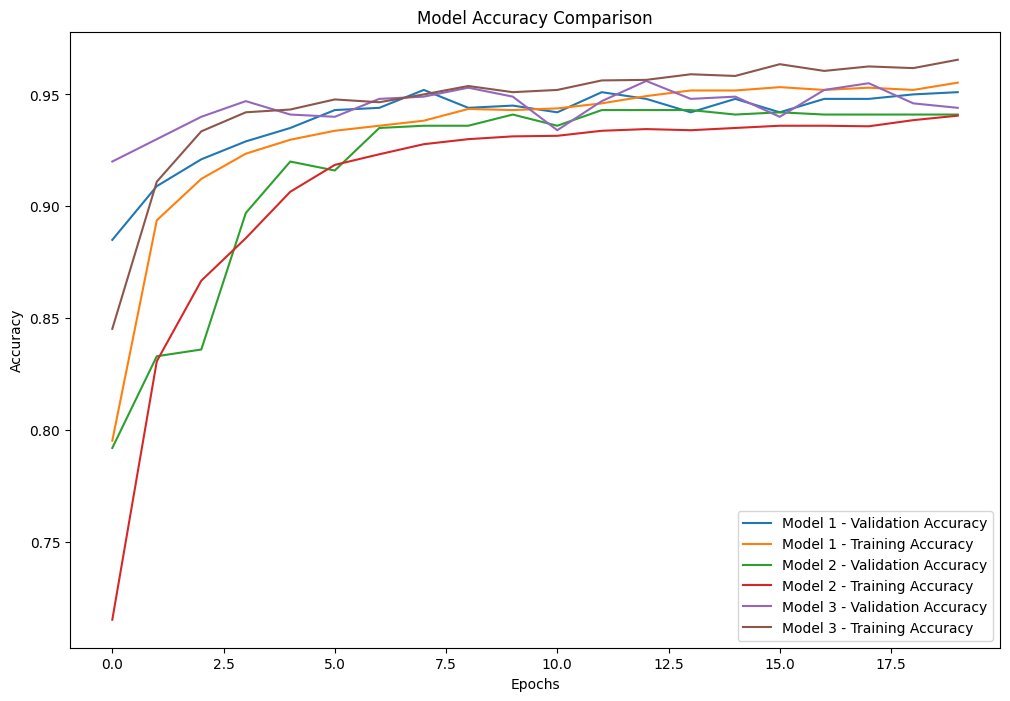

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for i, (history, label) in enumerate(zip([history1, history2, history3], ['Model 1', 'Model 2', 'Model 3'])):
    plt.plot(history.history['val_accuracy'], label=f'{label} - Validation Accuracy')
    plt.plot(history.history['accuracy'], label=f'{label} - Training Accuracy')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()